# Proposition de corrigé pour le sujet 0 de l'épreuve d'informatique du CAPES

# Problème 1

## Partie A : représentation des L-Systèmes

In [1]:
import turtle
from turtle import forward, left, right

## Le module turtle
### Question 1

In [ ]:
turtle.resetscreen()  # Initialisation, non demandée
for angle in [90, 30, 120, 30]:
    forward(100)
    left(angle)
forward(100)
turtle.done()  # Pour terminer, non demandé

## Un alphabet pour coder les figures
### Question 2

$\mathcal{F}(100, 30, \verb?"F+++F+F++++F+F"?)$ est un code pour la figure "maison". Le code pour une figure n'est pas unique : on pourrait aussi prendre par exemple $\mathcal{F}(50, 15, \verb?"FF++++++FF++FF++++++++FF++FF"?)$.

### Question 3

In [ ]:
def dessiner(unite, angle, motif):
    """Affiche le dessin du motif `motif` en prenant les valeurs `unite` et `angle`
    et retourne 0 si celui-ci a pu être réalisé intégralement et 1 sinon."""
    try:
        turtle.resetscreen()
        for action in motif:
            if action == 'F':
                forward(unite)
            elif action == '+':
                left(angle)
            elif action == '-':
                right(angle)
            else:
                turtle.done()
                return 1
        turtle.done()
        return 0
    except turtle.Terminator:
        return 1

La construction try-with ajoutée ici n'est bien sûr pas demandée.

In [ ]:
# On redessine la maison, avec encore un autre code possible
dessiner(100, 30, "F+++F+F--------F+F")

## Les L-systèmes

In [ ]:
dessiner(100, 60, "F+F--F+F--F+F--F+F--F+F--F+F")

### Question 4

In [3]:
def suivant(motif, regle):
    """Applique la règle `regle` au motif `motif et renvoie le nouveau motif."""
    nouveau_motif = ""
    for action in motif:
        if action == 'F':
            nouveau_motif += regle
        else:
            nouveau_motif += action
    return nouveau_motif

In [4]:
suivant("F--F--F", "F+F--F+F")

'F+F--F+F--F+F--F+F--F+F--F+F'

In [5]:
# En utilisant la fonction replace
def suivant_(motif, regle):
    return motif.replace("F", regle)

### Question 5

In [6]:
def evolution(axiome, regle, etape):
    """Applique `etape` fois la règle `regle` à l'axiome `axiome."""
    motif = axiome
    for _ in range(etape):
        motif = suivant(motif, regle)
    return motif

In [7]:
evolution("F", "F+", 4)

'F++++'

In [ ]:
dessiner(10, 60, evolution("F--F--F", "F+F--F+F", 3))

### Question 6

On procède par récurrence sur $n \in \mathbf{N}$. Pour $n = 0$, le motif du flocon est "F−−F−−F" qui contient bien $3\times4^0 =3$ caractères "F" et $4^1 = 4$ actions de rotations. Soit $n \geq 0$, et supposons la propriété vraie pour ce rang : le motif contient $3\times4^n$ actions "F" et $4^{n+1}$ actions de rotations. Chaque caractère "F" est remplacé dans le motif par $4$ caractères "F", donc à l'étape $n+1$ il y a $4\times3\times4^n=3\times4^{n+1}$. Le nombre d'actions de rotations est le nombre d'actions dans le motif de départ plus le nombre d'actions nouvellement introduites soit $4^{n+1} + 3\times4^n\times4=(3 + 1)\times4^{n + 1}=4^{n + 2}$. Ainsi, la propriété est démontrée au rang $n+1$ et la récurrence est établie.

In [8]:
# Vérifions
motif_etape_10 = evolution("F--F--F", "F+F--F+F", 10)
assert motif_etape_10.count("F") == 3 * (4 ** (10))
assert motif_etape_10.count("+") + motif_etape_10.count("-") == 4 ** 11

### Question 7



In [9]:
def temps_dessin(unite, etape):
    print("{}s".format(unite * 3 * (4 ** etape) / 1000 + 60 * 4 ** (etape + 1) / 800))
    
temps_dessin(2, 4)

78.336s


Sans calculatrice : $2\times3\times4^4 = 3\times2^9 \approx 10^3$ donc le temps pour avancer est environ d'une seconde. $60\times4^5 \approx 6 \times 10^4$ donc le temps de rotation est d'environ $75$s, pour un temps total d'environ $76$s, estimation assez proche du résultat réel. (Rappel : $2^{10} \approx 10^3$). Remarque : il faut beaucoup tourner !

## Nouveau mode de représentation
### Question 10

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt

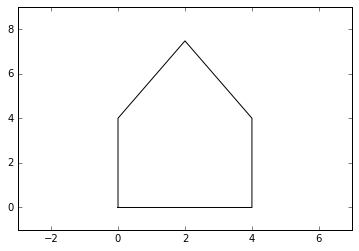

In [11]:
x_liste = [0, 0, 2, 4, 4, 0]
y_liste = [0, 4, 4 + 2 * sqrt(3), 4, 0, 0]
plt.plot(x_liste, y_liste, 'k-')
plt.axis([-3, 7, -1, 9])  # Non demandé
plt.show()

### Question 10

In [12]:
from math import cos, sin, radians

In [13]:
def plt_forward(unite, position):
    """Calcule la nouvelle position lorsque l'on effectue une action "F" sur `position`"""
    x, y, d = position
    return x + unite * cos(radians(d)), y + unite * sin(radians(d)), d

def plt_left(angle, position):
    """Calcule la nouvelle position lorsque l'on effectue une action "+" sur `position`"""
    x, y, d = position
    return x, y, d + angle

def plt_right(angle, position):
    """Calcule la nouvelle position lorsque l'on effectue une action "-" sur `position`"""
    return plt_left(-angle, position) 
    

La conversion de l'angle est un piège qui, je pense, ne serait pas pénalisé ici. La fonction `randians` n'est pas forcément connue, mais la conversion à la main est bien sûr de niveau CAPES (avec `math.pi`, qui est rappelé en annexe de même que `math.cos` et `math.sin`).

### Question 11

In [14]:
def dessine(unite, angle, motif):
    """Affiche le dessin du motif `motif` en prenant les valeurs `unite` et `angle`
    et retourne 0 si celui-ci a pu être réalisé intégralement et 1 sinon, en utilisant
    matplotlib.pyplot au lieu de turtle."""
    x_liste, y_liste = [0], [0]
    position = (0, 0, 0)
    for action in motif:
        if action == 'F':
            position = plt_forward(unite, position)
            x, y, _ = position
            x_liste.append(x)
            y_liste.append(y)
        elif action == '+':
            position = plt_left(angle, position)
        elif action == '-':
            position = plt_right(angle, position)
        else:
            return 0
    plt.plot(x_liste, y_liste, 'k-')
    plt.axis('equal')
    plt.show()
    return 1

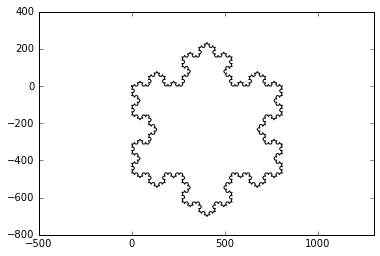

1

In [15]:
dessine(10, 60, evolution("F--F--F", "F+F--F+F", 4))

## Gestion des ramifications

La notation "F" pour une branche n'est pas heureuse ici (distincte de celle de la partie précédente).

### Question 12

$\verb?F? \rightarrow \verb?F+F+++++++++F+++++++?$

Ceci est très surprenant et induit en erreur, on aurait préféré donner les 21 premiers caractères $m = \verb?F+F+++++++++F++++++++?$ qui nous ramènent à un point où l'on peut appliquer à nouveau le même sous-motif. La règle complète consistant à enchaîner trois fois $m$. Ici, il manque une rotation gauche pour y parvenir.

De plus, le dessin de l'énoncé est obtenu pour un angle de 30° et non de 20° mais, même avec ce changement, on tronquerait en plein milieu d'un virage.

### Question 13

Cela présente l'avantage de ne pas avoir à faire des aller-retours et de ne pas être obligé de repasser plusieurs fois par le même chemin (ce qui peut d'ailleurs être différement géré par le dessin : invisible, gras ou bavures). Dans l'exemple précédent, les 18 derniers caractères (sur 21) servaient uniquement à revenir à la même configuration que celle obtenue après le caractère 2.

### Question 14

Voir juste après ce que l'on obtient avec l'ordinateur.

### Question 15

Cette question ne me semble pas très claire. Il est bien demandé de réécrire la fonction `dessiner`, donc celle utilisant le module `turtle` et non celle que l'on vient de faire avec `matplotlib` — à moins que ce ne soit une erreur d'énoncé ? Je ne vois pas comment on peut faire cela "sans effectuer de tracé" à moins d'utiliser des fonctionnalités de `turtle` que l'on n'est pas censé connaître (`goto`, `up`, `down`) ou de repasser au même endroit. De même, `matplotlib` permet de le faire mais pas sans une connaissance approfondie de la librairie qui, me semble-t-il, ne saurait être ici exigée.

Je donne ci-dessous la solution qui me semble attendue, avec `matplotlib`, en traçant au fur et à mesure. Cette question, en l'état, me semble difficile.

Remarque : la connaissance de la syntaxe des arguments par défaut est-elle attendue ?

In [16]:
def dessine_syntaxe_etendue(unite, angle, motif, azimut=0):
    """Affiche le dessin du motif `motif` en prenant les valeurs `unite` et `angle`
    et retourne 0 si celui-ci a pu être réalisé intégralement et 1 sinon, en utilisant
    matplotlib.pyplot au lieu de turtle, et en acceptant les deux nouveaux symboles
    '[' et ']'"""
    x_liste, y_liste = [0], [0]
    pile = []
    position = (0, 0, azimut)
    for action in motif:
        if action == 'F':
            position = plt_forward(unite, position)
            x, y, _ = position
            x_liste.append(x)
            y_liste.append(y)
        elif action == '+':
            position = plt_left(angle, position)
        elif action == '-':
            position = plt_right(angle, position)
        elif action == '[':
            pile.append(position)
        elif action == ']':
            if not pile:
                # Erreur de motif
                return 1
            # Il faut tracer le dessin jusqu'ici pour ne pas avoir une ligne entre la
            # dernière position et la position sauvegardée
            plt.plot(x_liste, y_liste, 'k-')
            x_liste, y_liste = [], []
            position = pile.pop()
            x, y, d = position
            x_liste.append(x)
            y_liste.append(y)
        else:
            return 0
    plt.plot(x_liste, y_liste, 'k-')
    plt.axis('equal')
    plt.show()
    return 1

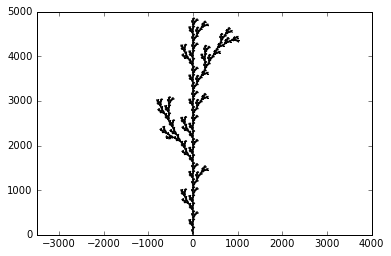

1

In [17]:
dessine_syntaxe_etendue(20, 30, evolution("F", "F[+F]F[-F]F", 5), azimut=90)

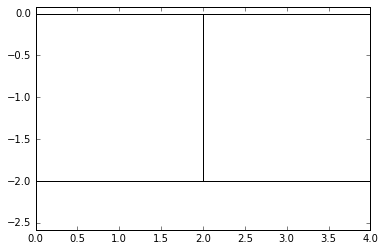

1

In [18]:
# Retour sur la question 14)
dessine_syntaxe_etendue(2, 90, "F[-F[+F]-F]F")

## Partie B : génération automatique de L-Systèmes

Je ne vois pas comment on peut choisir $40$ individus parmi les $100 - 80 = 20$ restants.

## Génération de la population d’origine

### Question 1

On a déjà implicitement fait cela à la question précédente (qui acceptait cependant d'empiler de nombreux états inutiles en fin d'expression, ce que l'on ne va pas autoriser ici). C'est le problème classique de savoir si une expression est bien parenthésée.

On peut utiliser explicitement une pile, mais considérer sa taille suffit :

In [19]:
def verifie(motif):
    """Vérifie que le motif peut être traçable"""
    taille_pile = 0
    for action in motif:
        if action == '[':
            taille_pile += 1
        elif action == ']':
            if taille_pile == 0:
                return False
            taille_pile -= 1
    return taille_pile == 0

In [20]:
verifie("]+F-F][---")

False

### Question 2

Les lignes 15 et 16 constituent l'appel récursif. La fonction procède par raffinages successifs en ne considérant à chaque fois que les pairs de caractères. Ainsi '++--' est simplifié en '+-', qui peut ensuite être simplifié en ''. On s'arrête quand plus aucune simplification n'est possible (ligne 11).

On a repéré trois erreurs dans le programme corrigé suivant :

In [21]:
def simplifie(regle):
    """Simplifie les motifs '+-, '-+', '-]' et '+]' d'une règle."""
    i, reponse = 0, ""  # quelle horreur :-)
    while i < len(regle) - 1:  # sinon dépassement à la ligne suivante (1)
        double = regle[i] + regle[i + 1]
        if double == "+-" or double == "-+":
            i = i + 1
        elif double != "-]" and double != "+]":  # and et non or (2)
            reponse = reponse + regle[i] 
        i = i + 1  
    if i == len(regle) - 1:  # ne rajouter le dernier que s'il n'a pas été supprimé (3)
        reponse = reponse + regle[-1]
    if len(reponse) != len(regle):
        reponse = simplifie(reponse)
    return reponse

In [22]:
simplifie("-+F+-[+-F-F+++--+--+]+F[F-]-F+-F")

'F[F-F]+F[F]-FF'

### Question 3

In [23]:
from random import randint, choice

In [24]:
def genereRegle():
    alphabet = ['F', '-', '+', '[', ']']
    regle = ""
    for i in range(randint(15, 30)):
        regle = regle + choice(alphabet)
    return regle

In [25]:
def population(n):
    """Créer une population de `n` règles de taille"""
    regles = set()
    while len(regles) < n:
        regle = simplifie(genereRegle())
        if (regle.count('[') >= 3 
            and regle.count('+') + regle.count('-') >= 2  # Plein d'autres moyens de faire
            and verifie(regle)
            and len(regle) >= 15):  # Pas clair si ce dernier point est exigé
            regles.add(regle)
    return regles

In [26]:
for regle in population(5):
    print(regle)

F[[][]][]F+F+F+[]
F[][+++[[]+[]F[]]-F]
++[[F+[[]]]FF]+F-F+[]-
[][F]-[[][[]+FF]]--
++F+FF+[]--[FF-F+F][]


Remarque : la fonction population peut, en théorie, ne jamais se terminer.

Remarque : on aurait facilement pu complèter `simplifie` pour supprimer les caractères '[', '+' et '-' inutiles à la fin.

## Mutation

### Question 4

In [27]:
def mutation(regle):
    """Réalise une mutation aléatoire en intervertissant deux rotations dans `regle`
    et en renvoyant la nouvelle chaîne mutée."""
    index_rotations = []
    position, rotation = choice([(pos, sym) for pos, sym in enumerate(regle) if sym in "+-"])
    regle_mutee = regle[:position]
    regle_mutee += '+' if rotation == '-' else '+'
    regle_mutee += regle[position + 1:]
    return regle_mutee

In [28]:
mutation("-[[[--[[[]]]]]F]")

'-[[[-+[[[]]]]]F]'

### Question 5

* a) Si $X \sim \mathcal{U}[0, 1]$ alors $\mathbf{P}(X < p) = p$
* b) La question précédente montre que la variable aléatoire $M$ à valeurs dans $\{0, 1\}$, qui vaut $1$ si et seulement si il y a eu une mutation, suit une loi de Bernoulli de paramètre $p$, dont l'espérance est également $p$. Il y a donc en moyenne $100p$ règles mutantes.

### Question 6

In [29]:
def extraitBranche(regle):
    """Renvoie un triplet (u, b, v) ou u + b + v = `regle` et où
    b est une branche de `regle` choisie aléatoirement (uniformément
    parmi toutes les branches de regle)."""
    assert verifie(regle)
    branches = []
    pile = []
    for i, char in enumerate(regle):
        if char == '[':
            pile.append(i)
        elif char == ']':
            start = pile.pop()
            branches.append((start, i))
    start, end = choice(branches)
    return regle[:start], regle[start: end + 1], regle[end + 1:] 
            

In [30]:
extraitBranche("F[-FF]+[FF[-F]]-FF[-F-F]")

('F[-FF]+', '[FF[-F]]', '-FF[-F-F]')

### Question 7

In [31]:
def croise(r1, r2):
    """Renvoie le croisement de deux règles où une branche 
    de `r1` est changée en une branche de `r2`."""
    u1, b1, v1 = extraitBranche(r1)
    u2, b2, v2 = extraitBranche(r2)
    return u1 + b2 + v1

In [32]:
croise("F[-FF]+[FF[-F]]-FF[-F-F]", "F[-FF]+[FF[-F]]-FF[-F-F]")  # Pourquoi pas se croiser avec soi-même ?

'F[-FF]+[FF[-F]]-FF[FF[-F]]'

# Problème 2

## Partie A

### Question 1

000, 001, 011, 010, 110, 100, 101, 111

### Question 2

Pourquoi $k < 10$ ? On a besoin de $k = 10$ dans la dernière question.

In [33]:
from itertools import product
from math import log

In [34]:
def motn(n, k):
    """Renvoie la liste des mots de longueur `n` sur l'alphabet [|0, k -1|]"""
    assert k <= 10
    return [''.join(map(str, mot)) for mot in product(range(k), repeat=n)]

In [35]:
motn(3, 2)

['000', '001', '010', '011', '100', '101', '110', '111']

### Question 3

$k^n$

### Question 4

$2^n \leq M \Rightarrow n \leq \log_2M$

$log_2(5\times10^8) = log_25 + 8 \times log_210 \approx 2.3 + 8\times3.3 \approx 28.7$

On peut donc au plus considérer des mots de longueur $28$.

In [36]:
# La vrai valeur
log(5e8, 2)

28.897352853986263

## Partie B

### Question 1

1011, 0111, 1110, 1101

### Question 2

Il y a $n$ permutations circulaires donc un mot peut avoir au plus $n$ représentants.

Si l'alphabet contient au moins deux symboles (par exemple `a` et `b`), alors le maximum est atteint, par exemple par le mot $ab^{n - 1}$.

### Question 3

Au pire (ou au mieux), tous les mots de $n$ lettres admettent exactement $n$ représentants. Considérons la relation d'équivalence $u \sim v$ si $u$ et $v$ représentent le même mot circulaire et comptons le nombre de classes. La taille de chaque classe est donc au plus $n$, il y a donc au minimum $\frac{\mathcal{M}(n, k)}{n} = \frac{k^n}{n}$ classes et donc mots circulaires de taille $n$ sur l'alphabet de taille $k$. Ce minimum n'est pas atteint car le mot $a^n$, par exemple, admet un unique représentant.

### Question 4

In [37]:
class MotCirculaire:
    """
    La classe MotCirculaire est une implémentation naïve des listes circulaires.
    On se contente ici de listes de caractères, que l'on implémente au moyen de chaînes
    de caractères (en doublant la chaîne).
    """

    def __init__(self, representant):
        """
        Initialisation de la liste circulaire à partir d'une chaîne de caractères.
        """
        self.chaine = representant * 2
        self.longueur = len(representant)

    def __len__(self):
        """
        Renvoie la longueur de la liste circulaire.
        """
        return self.longueur

    def representant(self):
        """
        Renvoie le représentant initial de la liste circulaire
        """
        return self.chaine[:len(self)]

    def estEgal(self, autreMot):
        """
        Renvoie True si autreMot est un représentant du même mot circulaire.
        """
        for i in range(len(self)):
            if autreMot.representant() == self.chaine[i: i + len(self)]:
                return True
        return False

### Question 5

In [38]:
mot1 = MotCirculaire("01001")
mot2 = MotCirculaire("10010")
mot1.estEgal(mot2)

True

### Question 6

Dans $0022120110$ les mots $00, 01, 02, 10, 11, 12, 20, 21$ et $22$ apparaissent exactement une fois.

### Question 7

Dans $0001110100$, les mots $000, 001, 010, 011, 100, 101, 110$ et $111$ apparaissent exactement une fois donc $00011101$ est un mot de Buijn d'ordre $(3, 2)$.

### Question 8

Dans un mot de Bruijn $m=(m_0, \dots, m_{p-1})$ chaque position $0 \leq i \leq p - 1$ correspond exactement à un unique mot de $\mathcal{M}(n, k)$. Un mot de Bruijn a donc pour taille $p = |\mathcal{M}(n, k)| = k^n$ exactement, et donc a fortiori plus petite que $n\times k^n$. Tous les représentants ont la même taille.

## Partie C

### Question 1 et 2

In [39]:
import networkx as nx
import nxpd  # Pour représenter le graphe, non demandé

In [40]:
def genGrapheDeBruijn(n, k):
    """Renvoie le graphe de Bruijn (`n`, `k`)."""
    g = nx.DiGraph()
    nodes = motn(n, k)
    g.add_nodes_from(nodes)
    for node in nodes:
        for arc in map(str, range(k)):
            g.add_edge(node, node[1:] + arc, label=arc)
    return g

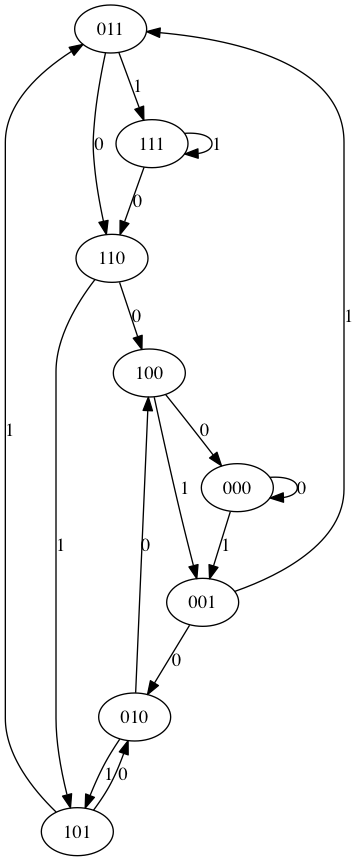

In [41]:
g_3_2 = genGrapheDeBruijn(3, 2)
nxpd.draw(g_3_2, show='ipynb')

### Question 3

$G_{3, 2}$ est eulérien car il admet le circuit eulérien $000 \rightarrow 000 \rightarrow 001 \rightarrow 010 \rightarrow 100 \rightarrow 001 \rightarrow 011 \rightarrow 111 \rightarrow 111 \rightarrow 110 \rightarrow 101 \rightarrow 010 \rightarrow 101 \rightarrow 011 \rightarrow 110 \rightarrow 100 \rightarrow 000$

In [42]:
# Avec networkx
for e in nx.eulerian_circuit(g_3_2, "000"):
    print(e[0], end = ' -> ')
print(e[1])

000 -> 001 -> 011 -> 111 -> 111 -> 110 -> 101 -> 010 -> 101 -> 011 -> 110 -> 100 -> 001 -> 010 -> 100 -> 000 -> 000


### Question 4

Le circuit eulérien $00 \rightarrow 00 \rightarrow 01 \rightarrow 11 \rightarrow 11 \rightarrow 10 \rightarrow 01 \rightarrow 10 \rightarrow 00$ a pour étiquette 01110100 qui est le mot de Bruijn que nous avons proposé à la question 7 (à permutation circulaire près).

### Question 5

Le graphe $G(n, k)$ comprend $k^n$ sommets d'où partent $k$ arêtes. Il y a donc $k^{n+1}$ arêtes. Un circuit eulérien est donc de cette taille et on retrouve le fait qu'un mot de Bruijn sur $(n, k)$ est de taille $k^n$.

### Question 6

In [43]:
def genMotDeBruijn(n, k):
    """Renvoie un représentant d'un mot de Bruijn d'ordre (`n`, `k`)"""
    if n == 1:
        return ''.join(map(str, range(k)))
    g = genGrapheDeBruijn(n - 1, k)
    circuit = nx.eulerian_circuit(g, g.nodes()[0])
    mot = [g[u][v]['label'] for u, v in circuit]
    return ''.join(mot)

In [44]:
genMotDeBruijn(3, 2)

'11101000'

### Question 7

Il est étrange de demander que `MotdeBuijn` ait pour *attribut* `representant`, alors que celui-ci est une méthode de la classe dont il hérite. Surtout que cela écraserait la méthode et rendrait la méthode `estEgal` non fonctionnelle.

In [45]:
class MotDeBruijn(MotCirculaire):
    """Représetation d'un mot de Bruijn."""
    
    def __init__(self, n, k):
        """Initialise un nouveau mot de Bruijn d'ordre (`n`, `k`)"""
        self.n = n
        self.k = k
        MotCirculaire.__init__(self, self.genMotDeBruijn())
        
    def motn(self):
        """Renvoie la liste des mots de longueur `n` sur l'alphabet [|0, k -1|]"""
        assert self.k < 10
        return [''.join(map(str, mot)) for mot in product(range(self.k), repeat=self.n)]

    def genGrapheDeBruijn(self):
        """Renvoie le graphe de Bruijn (`n`, `k`)."""
        g = nx.DiGraph()
        nodes = motn(self.n, self.k)
        g.add_nodes_from(nodes)
        for node in nodes:
            for arc in map(str, range(self.k)):
                g.add_edge(node, node[1:] + arc, label=arc)
        return g
    
    def genMotDeBruijn(self):
        """Renvoie un représentant d'un mot de Bruijn d'ordre (`n`, `k`)"""
        if self.n == 1:
            return ''.join(map(str, range(self.k)))
        g = genGrapheDeBruijn(self.n - 1, self.k)
        circuit = nx.eulerian_circuit(g, g.nodes()[0])
        mot = [g[u][v]['label'] for u, v in circuit]
        return ''.join(mot)
           

In [46]:
bruijn = MotDeBruijn(3, 2)
bruijn.representant()

'11101000'

La position de la question 7 est étrange, car elle laisse penser qu'il faut utiliser la classe que l'on vient de définir et/ou les fonctions précédentes. On n'utilise pas vraiment le résultat de la question C.5, mais plutôt notre solution de B.8 : en effet si une chaîne contient au moins une fois tous les mots $\mathcal{M}(n, k)$, et est de taille $k^n$, alors c'est un mot de Bruijn. On utilise ce résultat dans la fonction suivante :

In [47]:
def estDeBruijn(chaine, n, k):
    """Renvoie ``True`` si `chaine` est un mot de Bruijn d'ordre (`n`, `k`)."""
    if len(chaine) != k ** n:
        return False
    if k == 1:  # Cas particulier, ici len(chaine) == 1 <= n
        return chaine == "0"
    # Vérifie que toutes les sous-chaînes sont présentes
    for mot in motn(n, k):
        if mot not in chaine + chaine[:(n - 1)]:
            return False
    return True

In [48]:
estDeBruijn("10001110", 3, 2)

True

In [49]:
estDeBruijn("10101110", 3, 2)

False

In [50]:
# Quelques test:
for n, k in product(range(1, 5), repeat=2):
    bruijn = MotDeBruijn(n, k)
    assert estDeBruijn(bruijn.representant(), n, k)

## Partie D

### Question 1

$10^4$

### Question 2

$4\times10^4$

### Question 3

Il suffit de taper un mot de Bruijn. On a la garantie que le code s'y trouve.

### Question 4

La méthode naïve conduit dans le pire des cas à entrer $4\times10^4$ touches (et donc un mot de même longueur). Utiliser un mot de Bruijn (ici sur $(4, 10)$) permet de ne faire que $10^4 + 3$ touches, soit presque 4 fois moins.

Attention: petit piège, il ne faut pas oublier les 3 dernières touches à entrer.

### Question 5

Un calcul à la main donne 2h 46m 40s pour la méthode naive et 41m 41s pour la méthode avec un mot de Bruijn.

### Question 6

In [51]:
from random import randint

In [52]:
def genCode():
    """Génère un code de 4 chiffres aléatoire"""
    return ''.join(str(randint(0, 9)) for _ in range(4))

In [53]:
genCode()

'0558'

### Question 7

In [54]:
def evalueGainDeTemps():
    """Evalue et affiche le gain de temps relatif entre la méthode naïve
    et la méthode avec mot de Bruijn pour casser un digicode à 4 chiffres."""
    c = genCode()
    m = MotDeBruijn(4, 10).representant()
    m += m[:3]
    for i in range(4, len(m)):
        if m[i - 4: i] == c:
            break
    print("{:.2f}".format(i / 4e4))

In [55]:
evalueGainDeTemps()

0.07


Cette dernière fonction n'indique pas vraiment le gain de temps, puisque l'on considère le pire des cas pour la fonction naïve, ce qui n'est pas très juste.

Remarque : il existe des méthodes plus efficace pour rechercher une chaîne de caractère dans un texte (ici la position du code dans le mot de Bruijn).